In [1]:

import os, sys
sys.path.append(os.path.dirname(os.path.abspath("covidviz")) + (os.path.sep + '..'))
import covidviz as cvz
import pandas as pd
import geopandas as gpd


In [11]:
url_dep = 'https://france-geojson.gregoiredavid.fr/repo/departements.geojson'
url_reg = 'https://france-geojson.gregoiredavid.fr/repo/regions.geojson'
departments = gpd.read_file(url_dep)
regions = gpd.read_file(url_reg)


# import covid data 
df_covid_raw = cvz.Load_db().save_as_df()
df_covid_raw["date"] = df_covid_raw.date.astype(str) + ' 00:00'
df_covid_raw


Replace is False and data exists, so doing nothing. Use replace=True to re-download the data.


,date,granularite,maille_code,maille_nom,cas_confirmes,cas_ehpad,cas_confirmes_ehpad,cas_possibles_ehpad,deces,deces_ehpad,reanimation,hospitalises,nouvelles_hospitalisations,nouvelles_reanimations,gueris,depistes,source_nom,source_url,source_archive,source_type
0,2020-01-01 00:00,pays,FRA,France,NaN,NaN,NaN,NaN,44985.0,19780.0,NaN,24296.0,NaN,NaN,194901.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
1,2020-01-07 00:00,pays,FRA,France,2727321.0,NaN,149671.0,NaN,46539.0,20302.0,2582.0,24521.0,1438.0,180.0,200079.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
2,2020-01-08 00:00,pays,FRA,France,NaN,NaN,NaN,NaN,46815.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
3,2020-01-16 00:00,pays,FRA,France,2894347.0,NaN,159791.0,NaN,48783.0,21359.0,2741.0,25019.0,1197.0,188.0,209056.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
4,2020-01-17 00:00,pays,FRA,France,2910989.0,NaN,159791.0,NaN,48924.0,21359.0,2776.0,25269.0,697.0,136.0,209343.0,NaN,Ministère des Solidarités et de la Santé,NaN,NaN,ministere-sante
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50889,2021-04-16 00:00,region,REG-75,Nouvelle-Aquitaine,NaN,NaN,NaN,NaN,3343.0,NaN,259.0,1318.0,94.0,21.0,14066.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50890,2021-04-16 00:00,region,REG-76,Occitanie,NaN,NaN,NaN,NaN,3920.0,NaN,405.0,1855.0,118.0,33.0,17776.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50891,2021-04-16 00:00,region,REG-84,Auvergne-Rhône-Alpes,NaN,NaN,NaN,NaN,10497.0,NaN,688.0,3772.0,263.0,55.0,44021.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr
50892,2021-04-16 00:00,region,REG-93,Provence-Alpes-Côte d'Azur,NaN,NaN,NaN,NaN,7130.0,NaN,586.0,3246.0,225.0,56.0,34395.0,NaN,OpenCOVID19-fr,NaN,NaN,opencovid19-fr


In [14]:
# columns we want to keep 
columns = ['date', 'granularite', 'maille_code', 'maille_nom','cas_confirmes', 'hospitalises','deces']
df_covid_cleaned = cvz.choose_columns(df_covid_raw, columns)

# keep only departements
df_covid_cleaned_dep = cvz.choose_granularity(df_covid_cleaned,"departement")

# format departements
df_covid = cvz.format_granularity(df_covid_cleaned_dep, "departement")


# keep only regions
df_covid_cleaned_reg = cvz.choose_granularity(df_covid_cleaned,"region")

# format regions
df_covid_reg = cvz.format_granularity(df_covid_cleaned_reg, "region")

In [15]:
# Plot map with covid deads by department
map = cvz.Map_covid(df_covid, departments, "deces")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [17]:
# Plot map with covid hospitalized by department
map = cvz.Map_covid(df_covid, departments, "hospitalises")
map.plot_all()

Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

NoneType

In [5]:
# Plot map with covid death by region
map = cvz.Map_covid(df_covid_reg, regions, "deces")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

In [18]:
# Plot map with covid hospitalized by region
map = cvz.Map_covid(df_covid_reg, regions, "hospitalises")
map.plot_all()


Output()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{"initialViewState": {"bea…

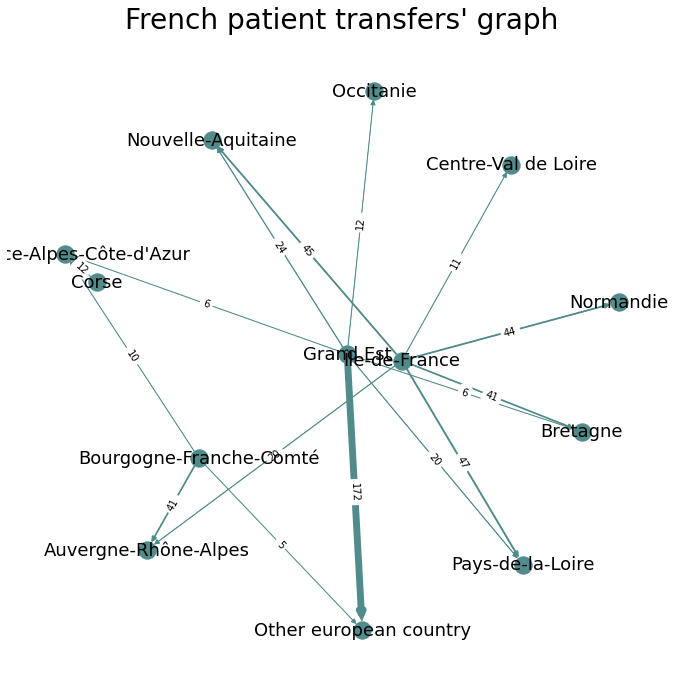

<Figure size 864x864 with 0 Axes>

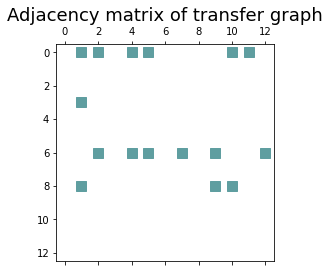

In [19]:
#%%
G = cvz.create_transfer_graph()
cvz.plot_transfer_graph(G)

#%%
A = cvz.plot_adjacency_matrix(G)

In [20]:
import pydeck as pdk 


In [21]:
map.to_json("bla.json")

AttributeError: 'Map_covid' object has no attribute 'to_json'